<h1>Import Required Libraries</h1>

In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




<h1>Fetch Stock Price Data</h1>

In [18]:
# Define the stock ticker symbol
ticker_symbol = "AAPL"  # Apple Inc.

# Fetch stock data
ticker = yf.Ticker(ticker_symbol)
data = ticker.history(period="5y")  # Last 5 years

# Display the first few rows
data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-11 00:00:00-05:00,65.151627,65.706657,65.076492,65.626671,78756800,0.0,0.0
2019-12-12 00:00:00-05:00,64.902008,66.060539,64.790519,65.793930,137310400,0.0,0.0
2019-12-13 00:00:00-05:00,65.793907,66.724609,65.665451,66.688255,133587600,0.0,0.0
2019-12-16 00:00:00-05:00,67.136665,68.055252,67.131820,67.829842,128186000,0.0,0.0
2019-12-17 00:00:00-05:00,67.759552,68.292763,67.572922,67.963142,114158400,0.0,0.0


<h1>Inspect the Dataset</h1>

In [19]:
# Check the dataset structure
data.info()

# Check for missing values
data.isnull().sum()

# Display summary statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-12-11 00:00:00-05:00 to 2024-12-10 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1258 non-null   float64
 1   High          1258 non-null   float64
 2   Low           1258 non-null   float64
 3   Close         1258 non-null   float64
 4   Volume        1258 non-null   int64  
 5   Dividends     1258 non-null   float64
 6   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000
mean,150.148569,151.814966,148.611699,150.299823,9.138912e+07,0.003595,0.003180
std,41.645823,41.845229,41.452656,41.680858,5.334656e+07,0.028374,0.112777
min,55.411089,55.513126,51.652716,54.509758,2.404830e+07,0.000000,0.000000
25%,125.530489,127.044257,123.926229,125.045805,5.598685e+07,0.000000,0.000000
50%,149.283902,151.803506,147.853283,149.676590,7.699675e+07,0.000000,0.000000
75%,175.947765,177.702666,174.444855,176.339462,1.088613e+08,0.000000,0.000000
max,246.889999,248.210007,245.339996,247.770004,4.265100e+08,0.250000,4.000000


<h1>Clean the Data</h1>

In [23]:
# Import necessary library for KNN Imputation
from sklearn.impute import KNNImputer

# Check the column names to ensure 'Adj Close' exists
print(data.columns)

# Initialize the KNN Imputer with n_neighbors set to 5 (can adjust for better performance)
knn_imputer = KNNImputer(n_neighbors=5)

# Modify the list of columns if 'Adj Close' is missing
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume']  # Update as needed

# Apply the KNN imputer on the numerical columns of the data
data[numerical_columns] = knn_imputer.fit_transform(data[numerical_columns])

# Confirm no missing values remain
print(data.isnull().sum())


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


<h1>Analyze and Visualize Data</h1>

<h2>Plot Closing Prices Over Time:</h2>

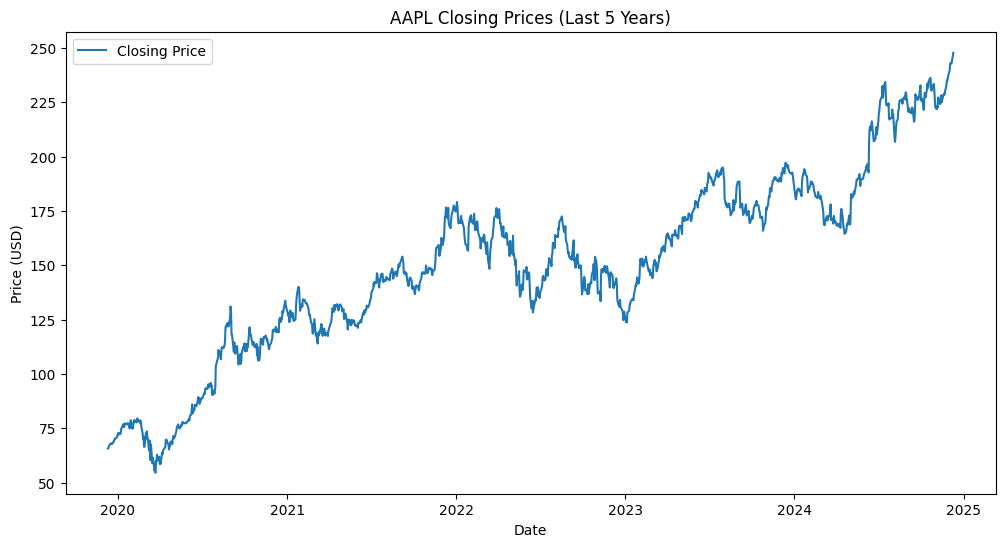

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Closing Price')
plt.title(f"{ticker_symbol} Closing Prices (Last 5 Years)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


<h2>Analyze Monthly Averages:</h2>

/var/folders/db/032g1gj13cd5yvj11k_gr10r0000gn/T/ipykernel_66372/2308124244.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['Month'] = data.index.to_period('M')


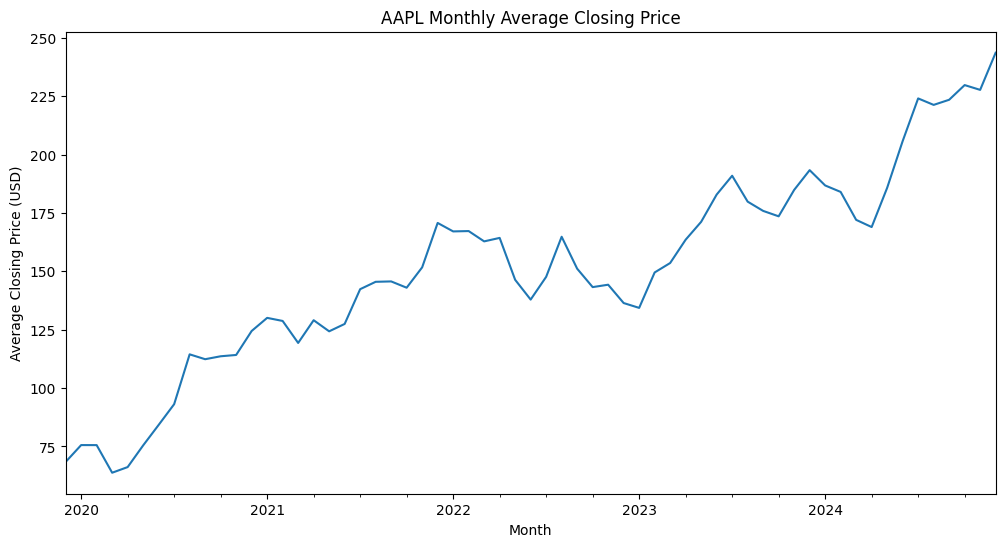

In [25]:
# Add a 'Month' column
data['Month'] = data.index.to_period('M')

# Group by month and calculate average closing price
monthly_avg = data.groupby('Month')['Close'].mean()

# Plot monthly averages
monthly_avg.plot(figsize=(12, 6), title=f"{ticker_symbol} Monthly Average Closing Price")
plt.xlabel("Month")
plt.ylabel("Average Closing Price (USD)")
plt.show()


<h2>Visualize Volume Traded:</h2>

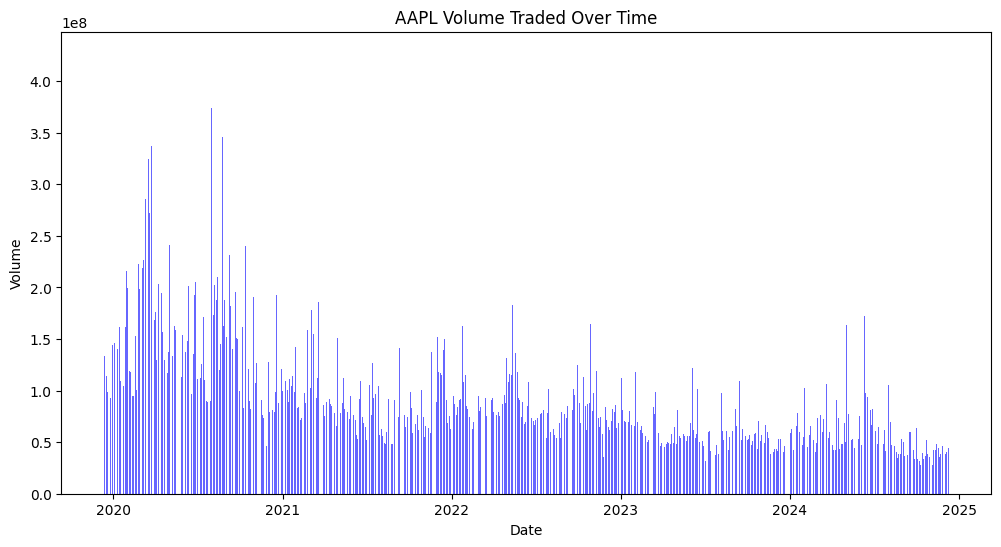

In [26]:
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Volume'], color='blue', alpha=0.6)
plt.title(f"{ticker_symbol} Volume Traded Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


<h1>Save Cleaned Data</h1>

In [27]:
# Save the cleaned and processed data to a CSV file
data.to_csv(f"{ticker_symbol}_cleaned_data.csv")
print(f"Cleaned data saved to {ticker_symbol}_cleaned_data.csv")


Cleaned data saved to AAPL_cleaned_data.csv
